## Differnet Criteria: 
Simple criteria are: 
- Budget Focus: Lowest Prices, Tolerant Crowd, Less than ideal perfect condition
- Family Focus: Seek balances between cost and convients, avoid extreme crows and wheather, value amentites and beginner and intermeidate terrian
- Expert/ Snow enthusiast: Prioritized Ideal snow condition and challenging terrain . less prices and crowds 


In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Finding Trends and Analysis on the number of visitor

In [169]:
df = pd.read_csv("climate_visitor_snow.csv", index_col=0)
df.head(5)

,Year,Week,Resort,Visitors,MaxTemp,MinTemp,Rainfall,Total Snowfall,Snowfall Days,Average Base Depth,Max Base Depth,Biggest Snowfall
0,2014,1,Mt. Baw Baw,555,4.957143,1.100000,24.4,39.0,9.0,9.0,23.0,9.0
1,2014,2,Mt. Baw Baw,804,5.485714,0.814286,21.0,39.0,9.0,9.0,23.0,9.0
2,2014,3,Mt. Baw Baw,993,1.042857,-1.814286,76.4,39.0,9.0,9.0,23.0,9.0
3,2014,4,Mt. Baw Baw,2976,2.528571,-0.957143,82.0,39.0,9.0,9.0,23.0,9.0
4,2014,5,Mt. Baw Baw,11112,0.685714,-2.257143,82.6,39.0,9.0,9.0,23.0,9.0


### Seasonality and Trends of Visitor
what is overall trends of ski resort visitation throughout the years?

In [144]:
df['Week_Year'] = 'W' + df['Week'].astype(str).str.zfill(2) + '-Y' + df['Year'].astype(str)

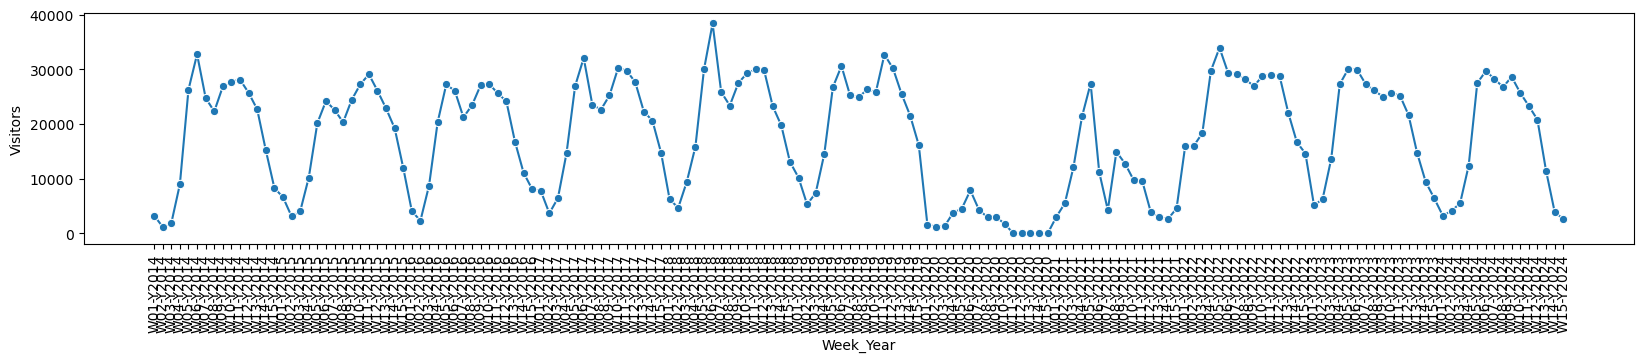

In [145]:
# Create a seaborn line plot
plt.figure(figsize=(20, 3))
sns.lineplot(data=df, x='Week_Year', y='Visitors' ,marker='o', errorbar= None)
plt.xticks(rotation = 90)

# Display the plot
plt.show()


Let's look into the total visited per year instead

Text(0.5, 1.0, 'Total number of Visitor per Year')

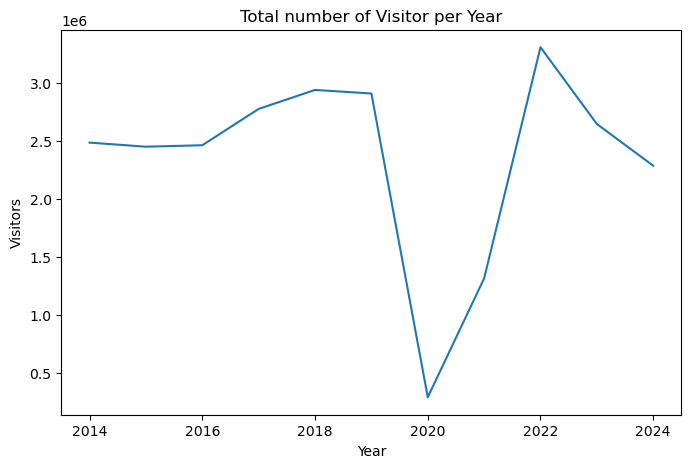

In [146]:
plt.figure(figsize=(8, 5))
visit_per_year = df.groupby(['Year'])['Visitors'].sum().reset_index()
sns.lineplot( visit_per_year, x= 'Year', y = 'Visitors')
plt.title('Total number of Visitor per Year')


obvious pattern, covid 2020 and 2021 have shown to dramatically reduced the number of visitors in total. Before Covids we can see that the number visitor was rising as well, there is a slight recovery after covid before dipping down.

Seasonal Pattern: 
- What is the overall pattern like throughout the years? What are the weeks to look out for that have the most people going around?

<Axes: xlabel='Week', ylabel='Visitors'>

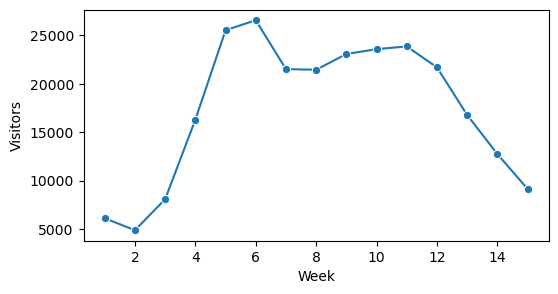

In [147]:
# temp = df[~df['Year'].isin([2020,2021])]
plt.figure(figsize=(6, 3))
sns.lineplot(data=df, x='Week', y='Visitors', marker='o',errorbar=None)

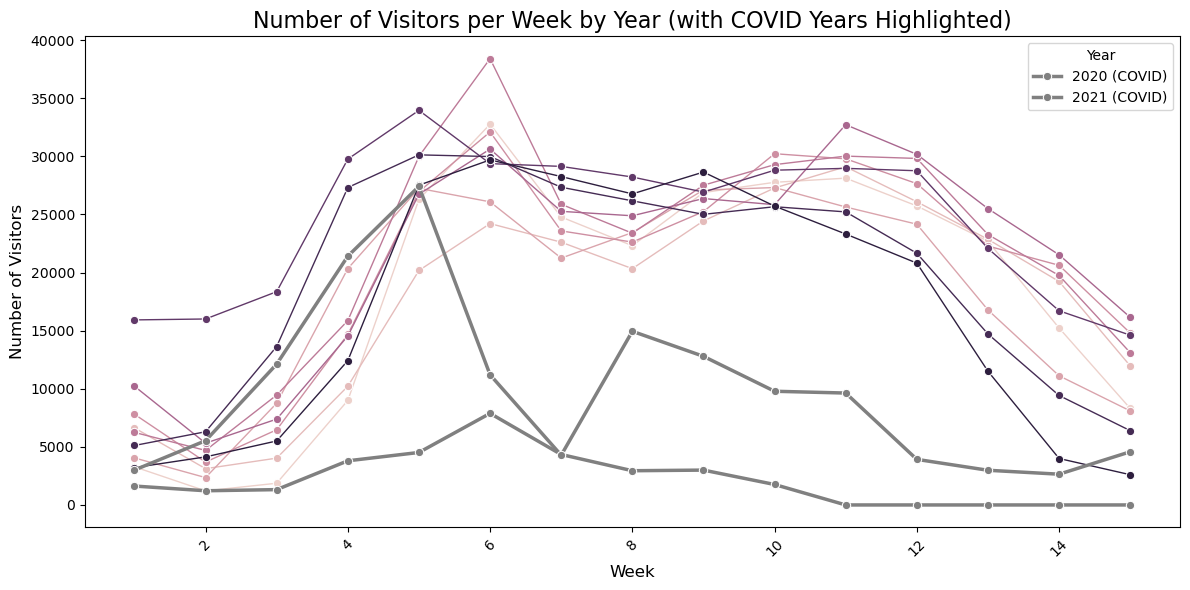

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Separate COVID and non-COVID data
non_covid_df = df[~df['Year'].isin([2020, 2021])]
covid_df = df[df['Year'].isin([2020, 2021])]

# Plot non-COVID years with default styling
sns.lineplot(
    data=non_covid_df,
    x='Week',
    y='Visitors',
    hue='Year',
    marker='o',
    linewidth=1,
    legend=False,  # Hide this legend; we'll handle it after
    errorbar=None
)

# Plot COVID years with special styling (bold & colored)
highlight_colors = {2020: 'gray', 2021: 'gray'}
for year in [2020, 2021]:
    sns.lineplot(
        data=covid_df[covid_df['Year'] == year],
        x='Week',
        y='Visitors',
        label=f'{year} (COVID)',
        marker='o',
        color=highlight_colors[year],
        linewidth=2.5,
        errorbar=None
    )

# Labels and title
plt.title('Number of Visitors per Week by Year (with COVID Years Highlighted)', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


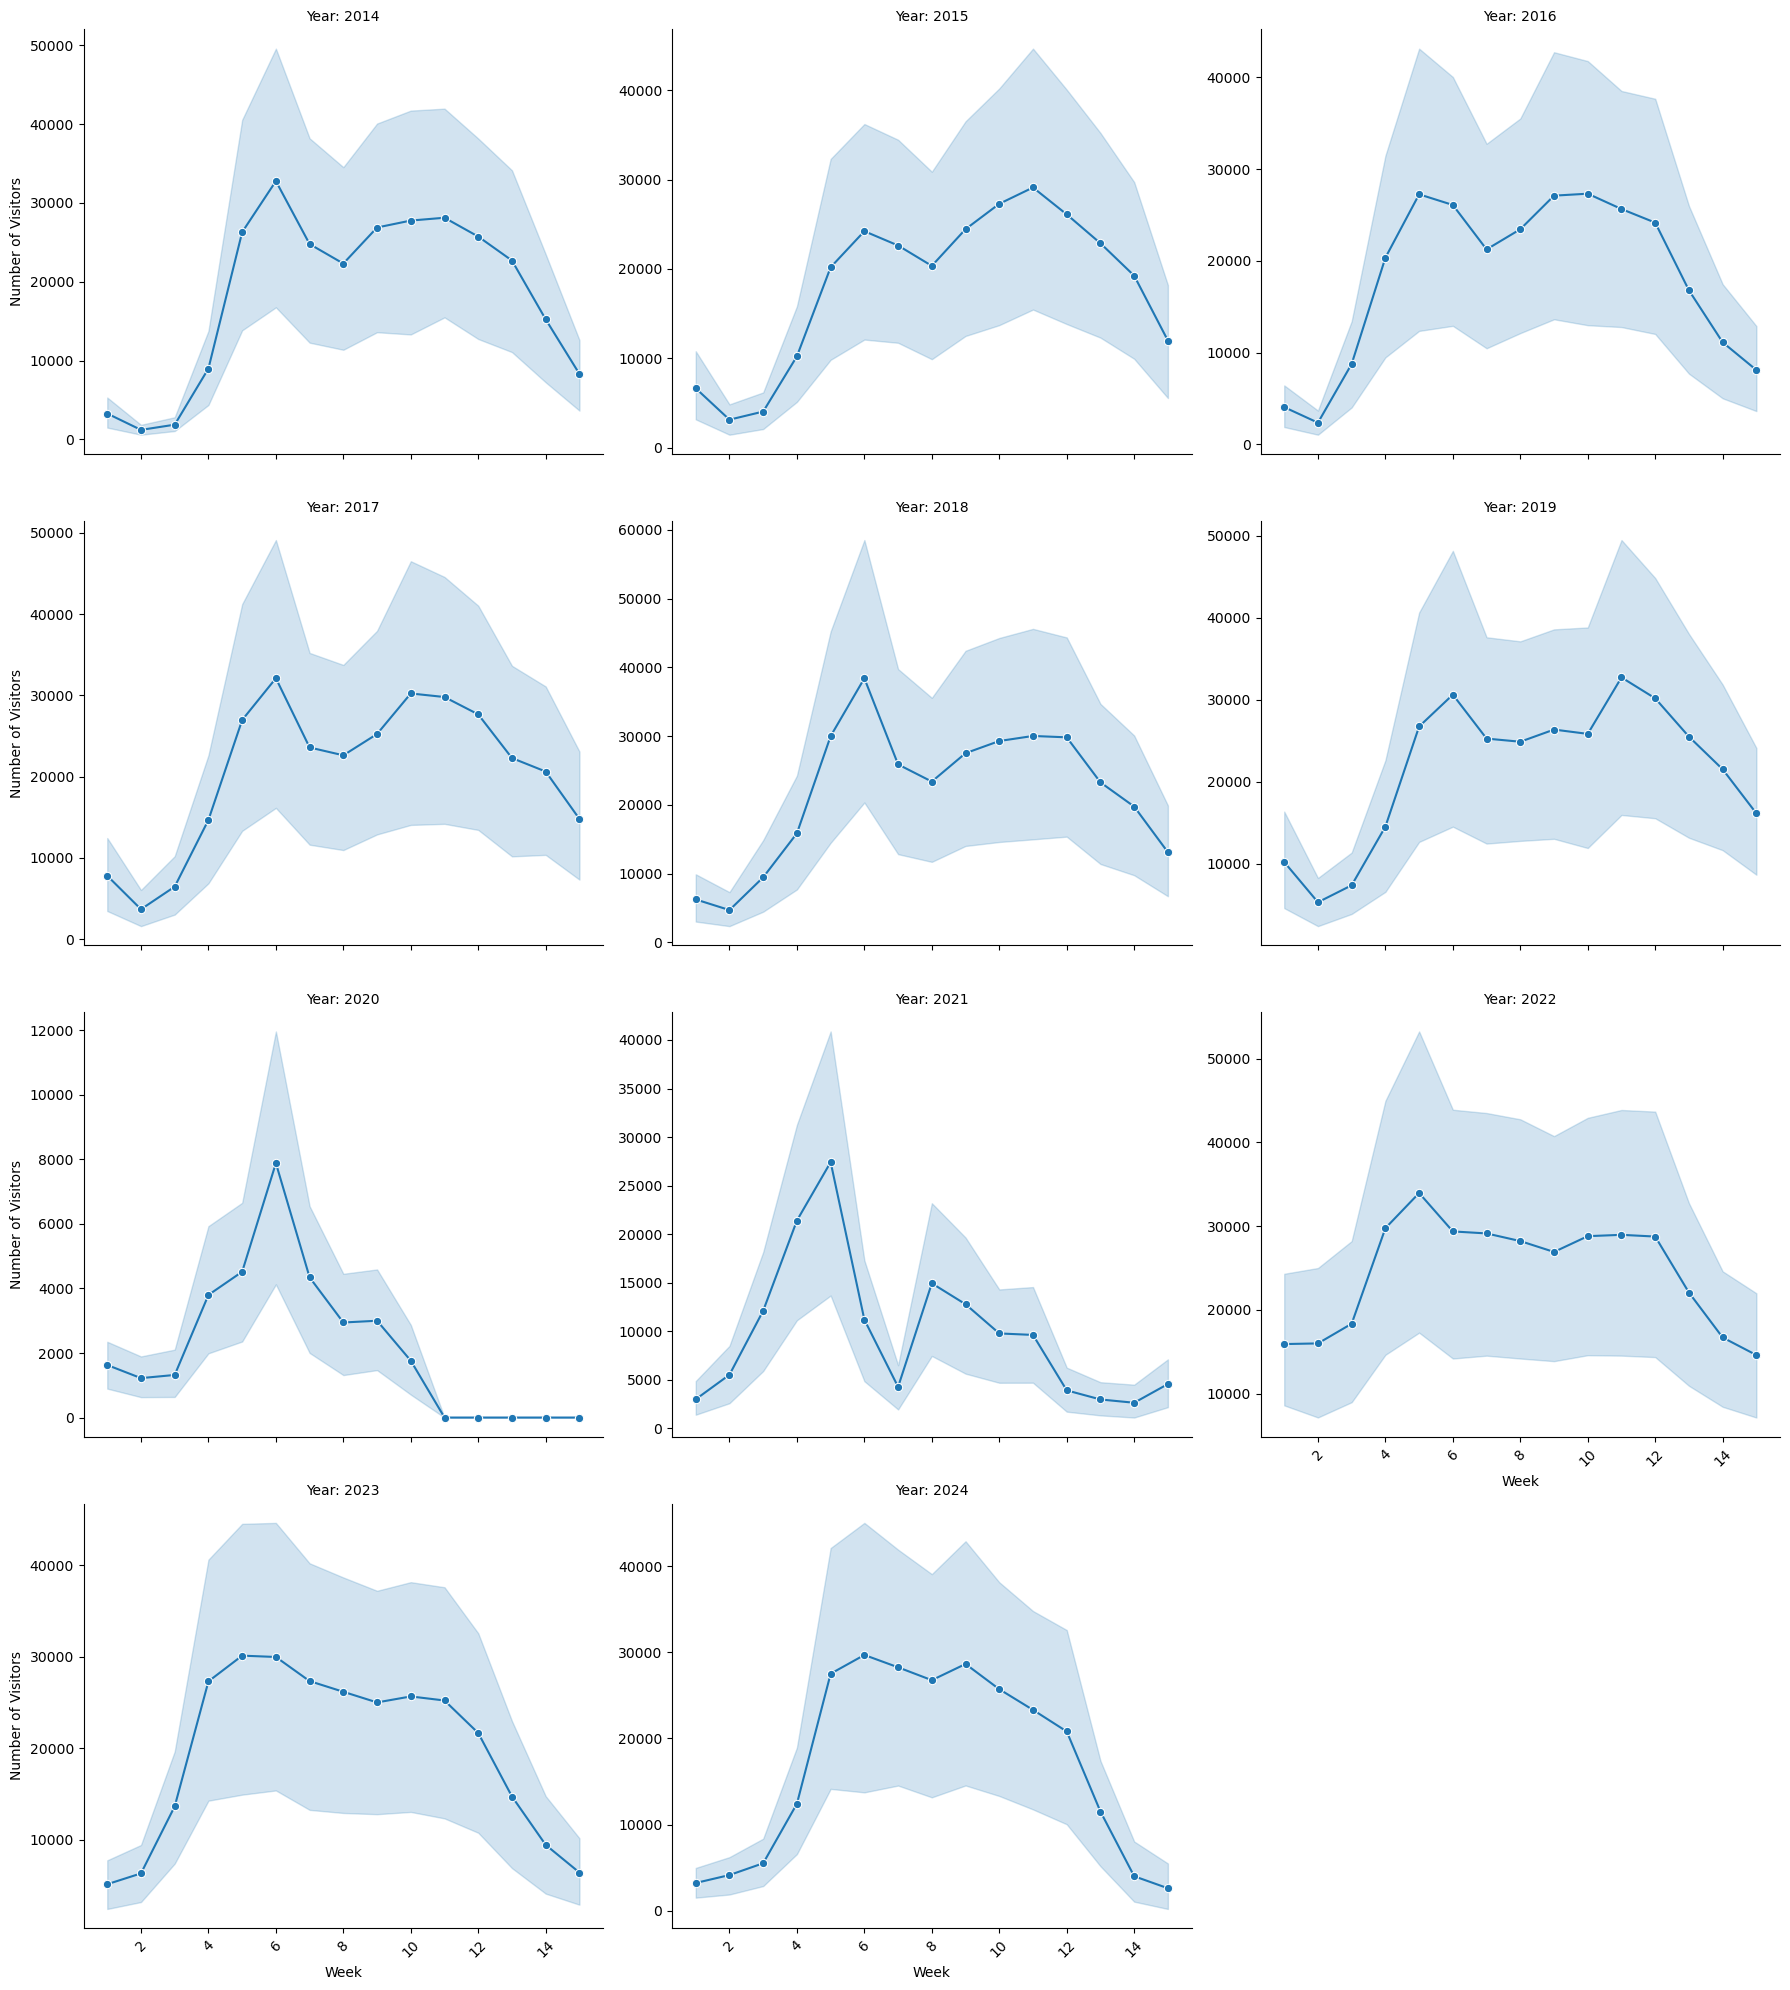

In [149]:
# Create faceted line plots (one column per year)
g = sns.relplot(
    data=df,
    x='Week',
    y='Visitors',
    kind='line',
    col='Year',
    marker='o',
    facet_kws={'sharey': False},  # Set to True if you want shared y-axis
    height=5,
    aspect=1.2,
    col_wrap= 3
)

# Adjust plot titles and layout
g.set_titles("Year: {col_name}")
g.set_axis_labels("Week", "Number of Visitors")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


Look at the overall seasonality of the skking pattern, initial july is when the peak season started to hit, ramping everything up, especially early july around 14 july or so. The pattenr started falling off at around week 11 and 12 , 18-Aug
25-Aug. So around late august the amount of people start to decrease.

we should try and find out WHY there is a peak around starting around July falling off afteward. Factors to included are: 
- temp 
- snow conditions
- holiday calendars

## Why is there a Peak Around Early July?
Key Question: "Is the mid-season peak driven by better weather or by external factors like holidays?"

In [ ]:
df = df[~df["Year"].isin([2020,2021])]

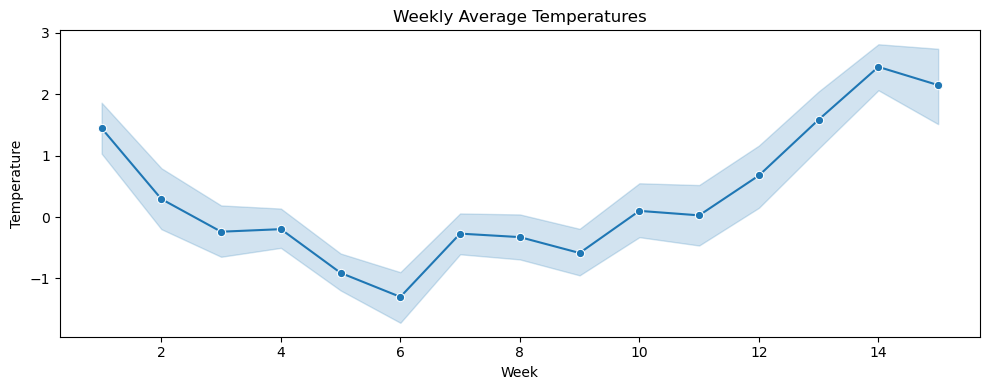

In [151]:
# Reshape the data to long format
df['TempRange'] = df['MaxTemp'] - df['MinTemp']
df['AvgTemp'] = (df['MaxTemp'] + df['MinTemp']) / 2

# Plot both temperatures on the same axis
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='Week', y='AvgTemp', marker='o')
plt.title('Weekly Average Temperatures')
plt.xlabel('Week')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()


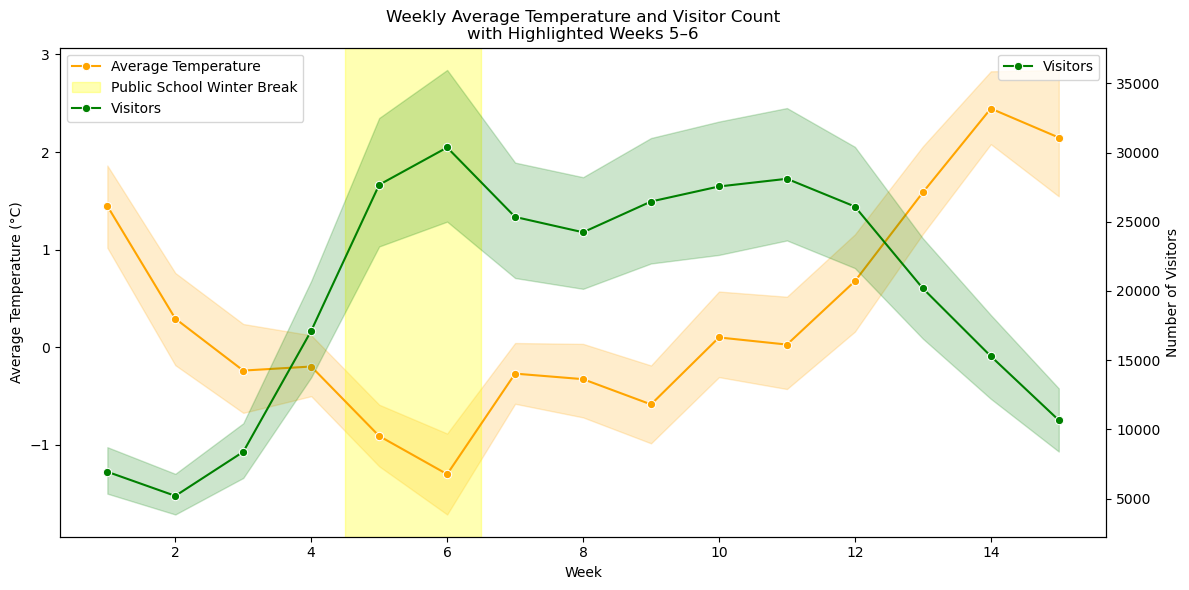

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot AvgTemp on the primary y-axis (left)
sns.lineplot(data=df, x='Week', y='AvgTemp', ax=ax1, label='Average Temperature', marker='o', color='orange')

# Set labels and ticks for primary axis (left)
ax1.set_xlabel('Week')
ax1.set_ylabel('Average Temperature (°C)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelcolor='black')

# Highlight Weeks 5 and 6
ax1.axvspan(4.5, 6.5, color='yellow', alpha=0.3, label='Public School Winter Break')

# Create secondary axis for visitors (right y-axis)
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Week', y='Visitors', ax=ax2, label='Visitors', marker='o', color='green')

# Set labels and ticks for secondary axis (right)
ax2.set_ylabel('Number of Visitors', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
plt.title('Weekly Average Temperature and Visitor Count\nwith Highlighted Weeks 5–6', color='black')
plt.tight_layout()
plt.show()




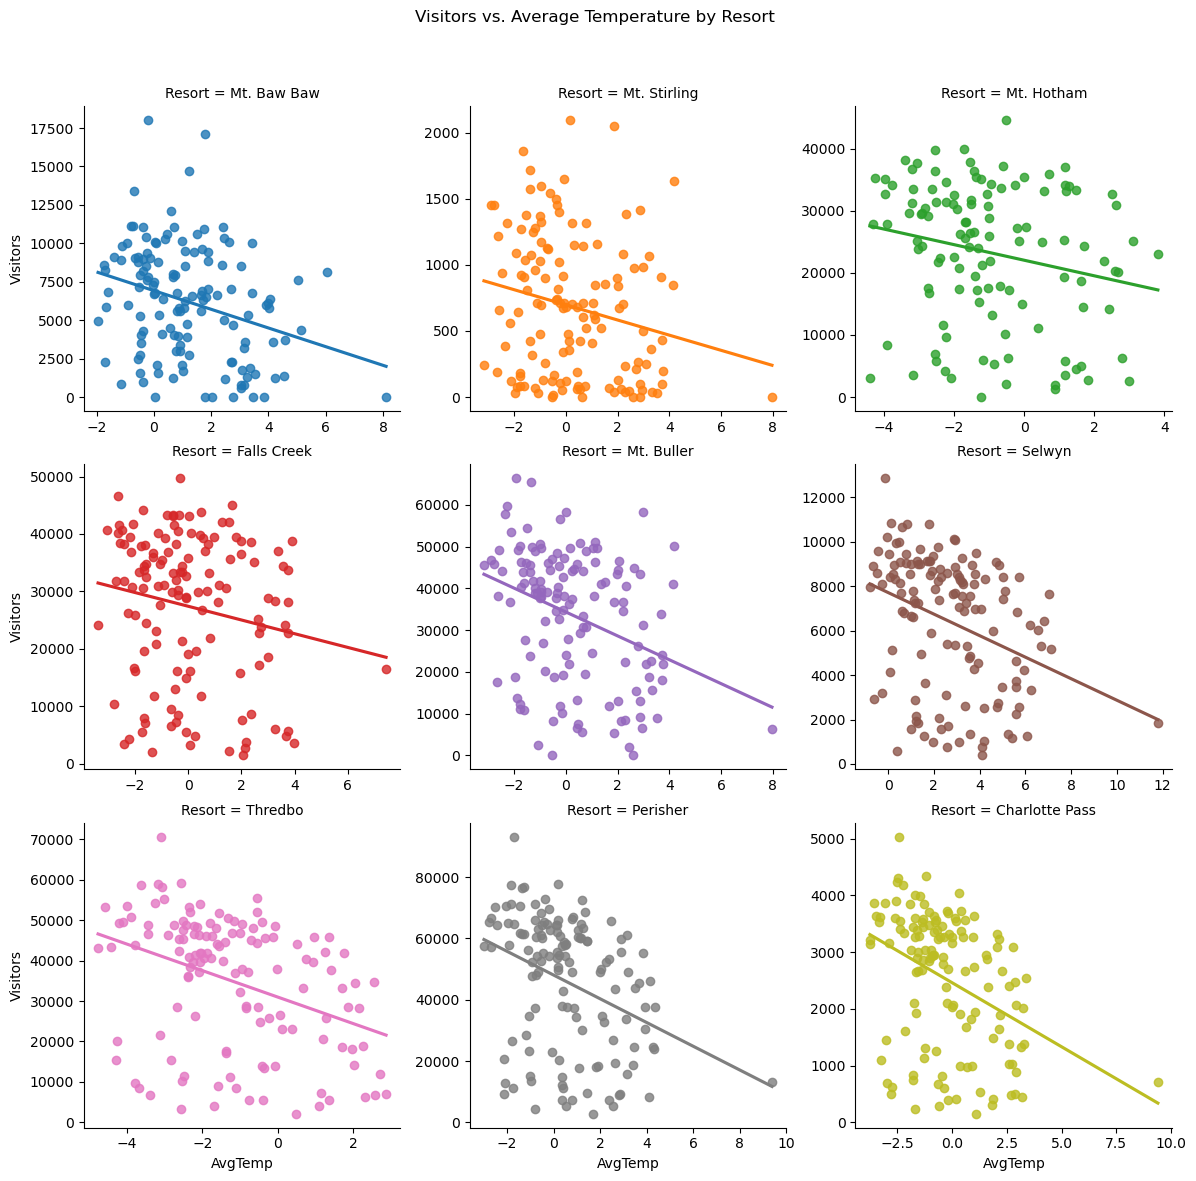

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a faceted lmplot with wrapping and independent x-axes
sns.lmplot(
    data=df,
    x="AvgTemp",
    y="Visitors",
    col="Resort",
    hue="Resort",
    col_wrap=3,         # Wrap after 3 columns (adjust as needed)
    height=4,
    aspect=1,
    markers='o',
    ci=None,
    facet_kws={'sharex': False, 'sharey':False}         # Allow different x-axis ranges per subplot
)

# Optional: Add a common title
plt.subplots_adjust(top=0.9)
plt.suptitle('Visitors vs. Average Temperature by Resort')

plt.show()



When the temp sit at it's lowest around the july there are more people going there as well since it's also the public winter holiday break it's hard to tell if there is anything to focus on. So let's look into more of the snow conditions factors instead.
There is a linear relationship between the two
we can try to use the average snow depth as a good appromixator of snow condition.

## SNOW CONDITION FACTORS

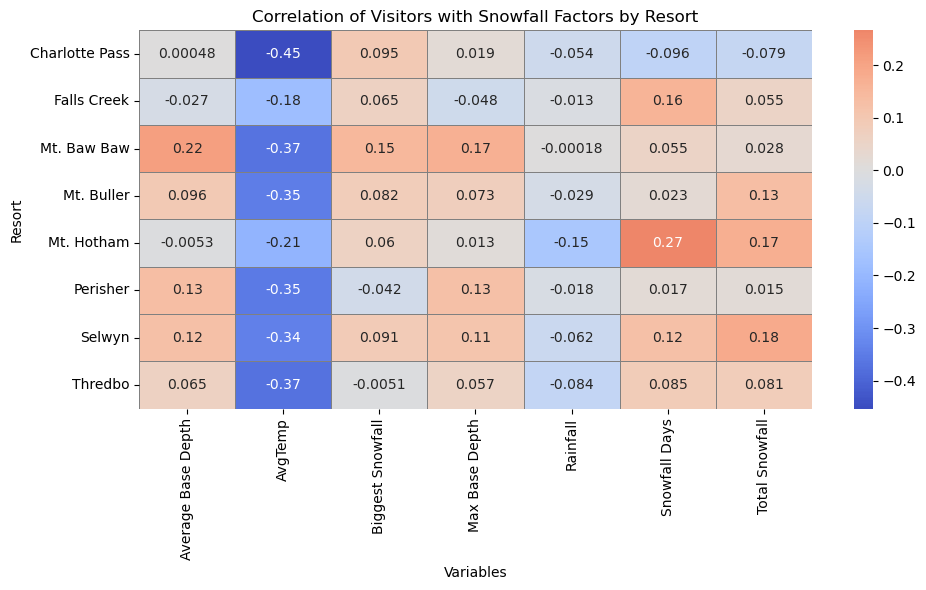

In [154]:

cols_of_interest = [
    'Visitors',
    'Rainfall',
    'Total Snowfall',
    'Snowfall Days',
    'Average Base Depth',
    'Max Base Depth',
    'Biggest Snowfall',
    'AvgTemp',
    'Resort'
]

# Filter and drop missing data
df_sub = df[~df["Year"].isin([2020,2021])][cols_of_interest].dropna().copy()

# Prepare list to collect rows for the final DataFrame
rows = []

# Group by resort and compute correlations
for resort, group in df_sub.groupby('Resort'):
    corr_matrix = group.drop(columns='Resort').corr()
    if 'Visitors' in corr_matrix.columns:
        visitors_corr = corr_matrix.loc['Visitors'].drop('Visitors')  # correlations with Visitors excluding self
        for variable, corr_value in visitors_corr.items():
            rows.append({
                'Resort': resort,
                'Variable': variable,
                'Correlation_with_Visitors': corr_value
            })

# Create a DataFrame from the collected rows
visitors_corr_df = pd.DataFrame(rows)

# Display the result
visitors_corr_df
# Pivot to make variables columns and resorts rows
corr_table = visitors_corr_df.pivot(index='Resort', columns='Variable', values='Correlation_with_Visitors').reset_index()

corr_table
# Set Resort as the index (for better heatmap display)
corr_table.set_index('Resort', inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_table,
    annot=True,
    cmap='coolwarm',
    center=0,         # center the colormap at zero for positive/negative correlation clarity
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Correlation of Visitors with Snowfall Factors by Resort')
plt.ylabel('Resort')
plt.xlabel('Variables')
plt.tight_layout()
plt.show()

Overall, snow conditions have no effect on the actual number of visitor themselves, the number of visitor is usually influences by the calendar times period around week 5 - 6 where public holiday like school break started happening. This is a perfect times for families to get together and celebrate.

All of these analysis will be use alongside other stuff to make final recommendation models

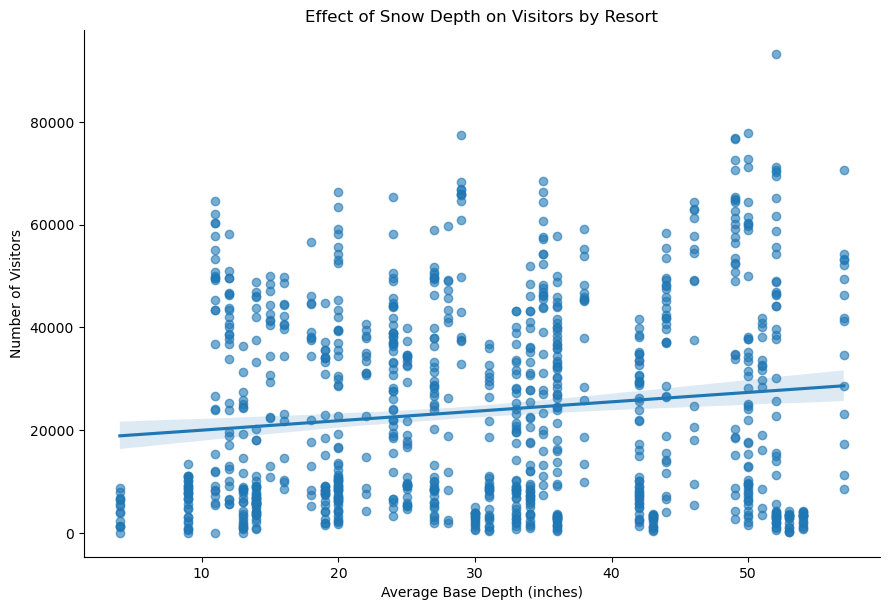

In [155]:
yearly_snow = df[['Year', 'Average Base Depth','Resort','Visitors']].drop_duplicates()
yearly_snow = yearly_snow[~yearly_snow['Year'].isin([2020,2021])]

sns.lmplot(
    x='Average Base Depth',
    y='Visitors',      # color by Resort
    data=yearly_snow,
    height=6,
    aspect=1.5,
    markers='o',
    scatter_kws={'alpha':0.6}  # slightly transparent points
)
plt.title('Effect of Snow Depth on Visitors by Resort')
plt.xlabel('Average Base Depth (inches)')
plt.ylabel('Number of Visitors')
plt.show()


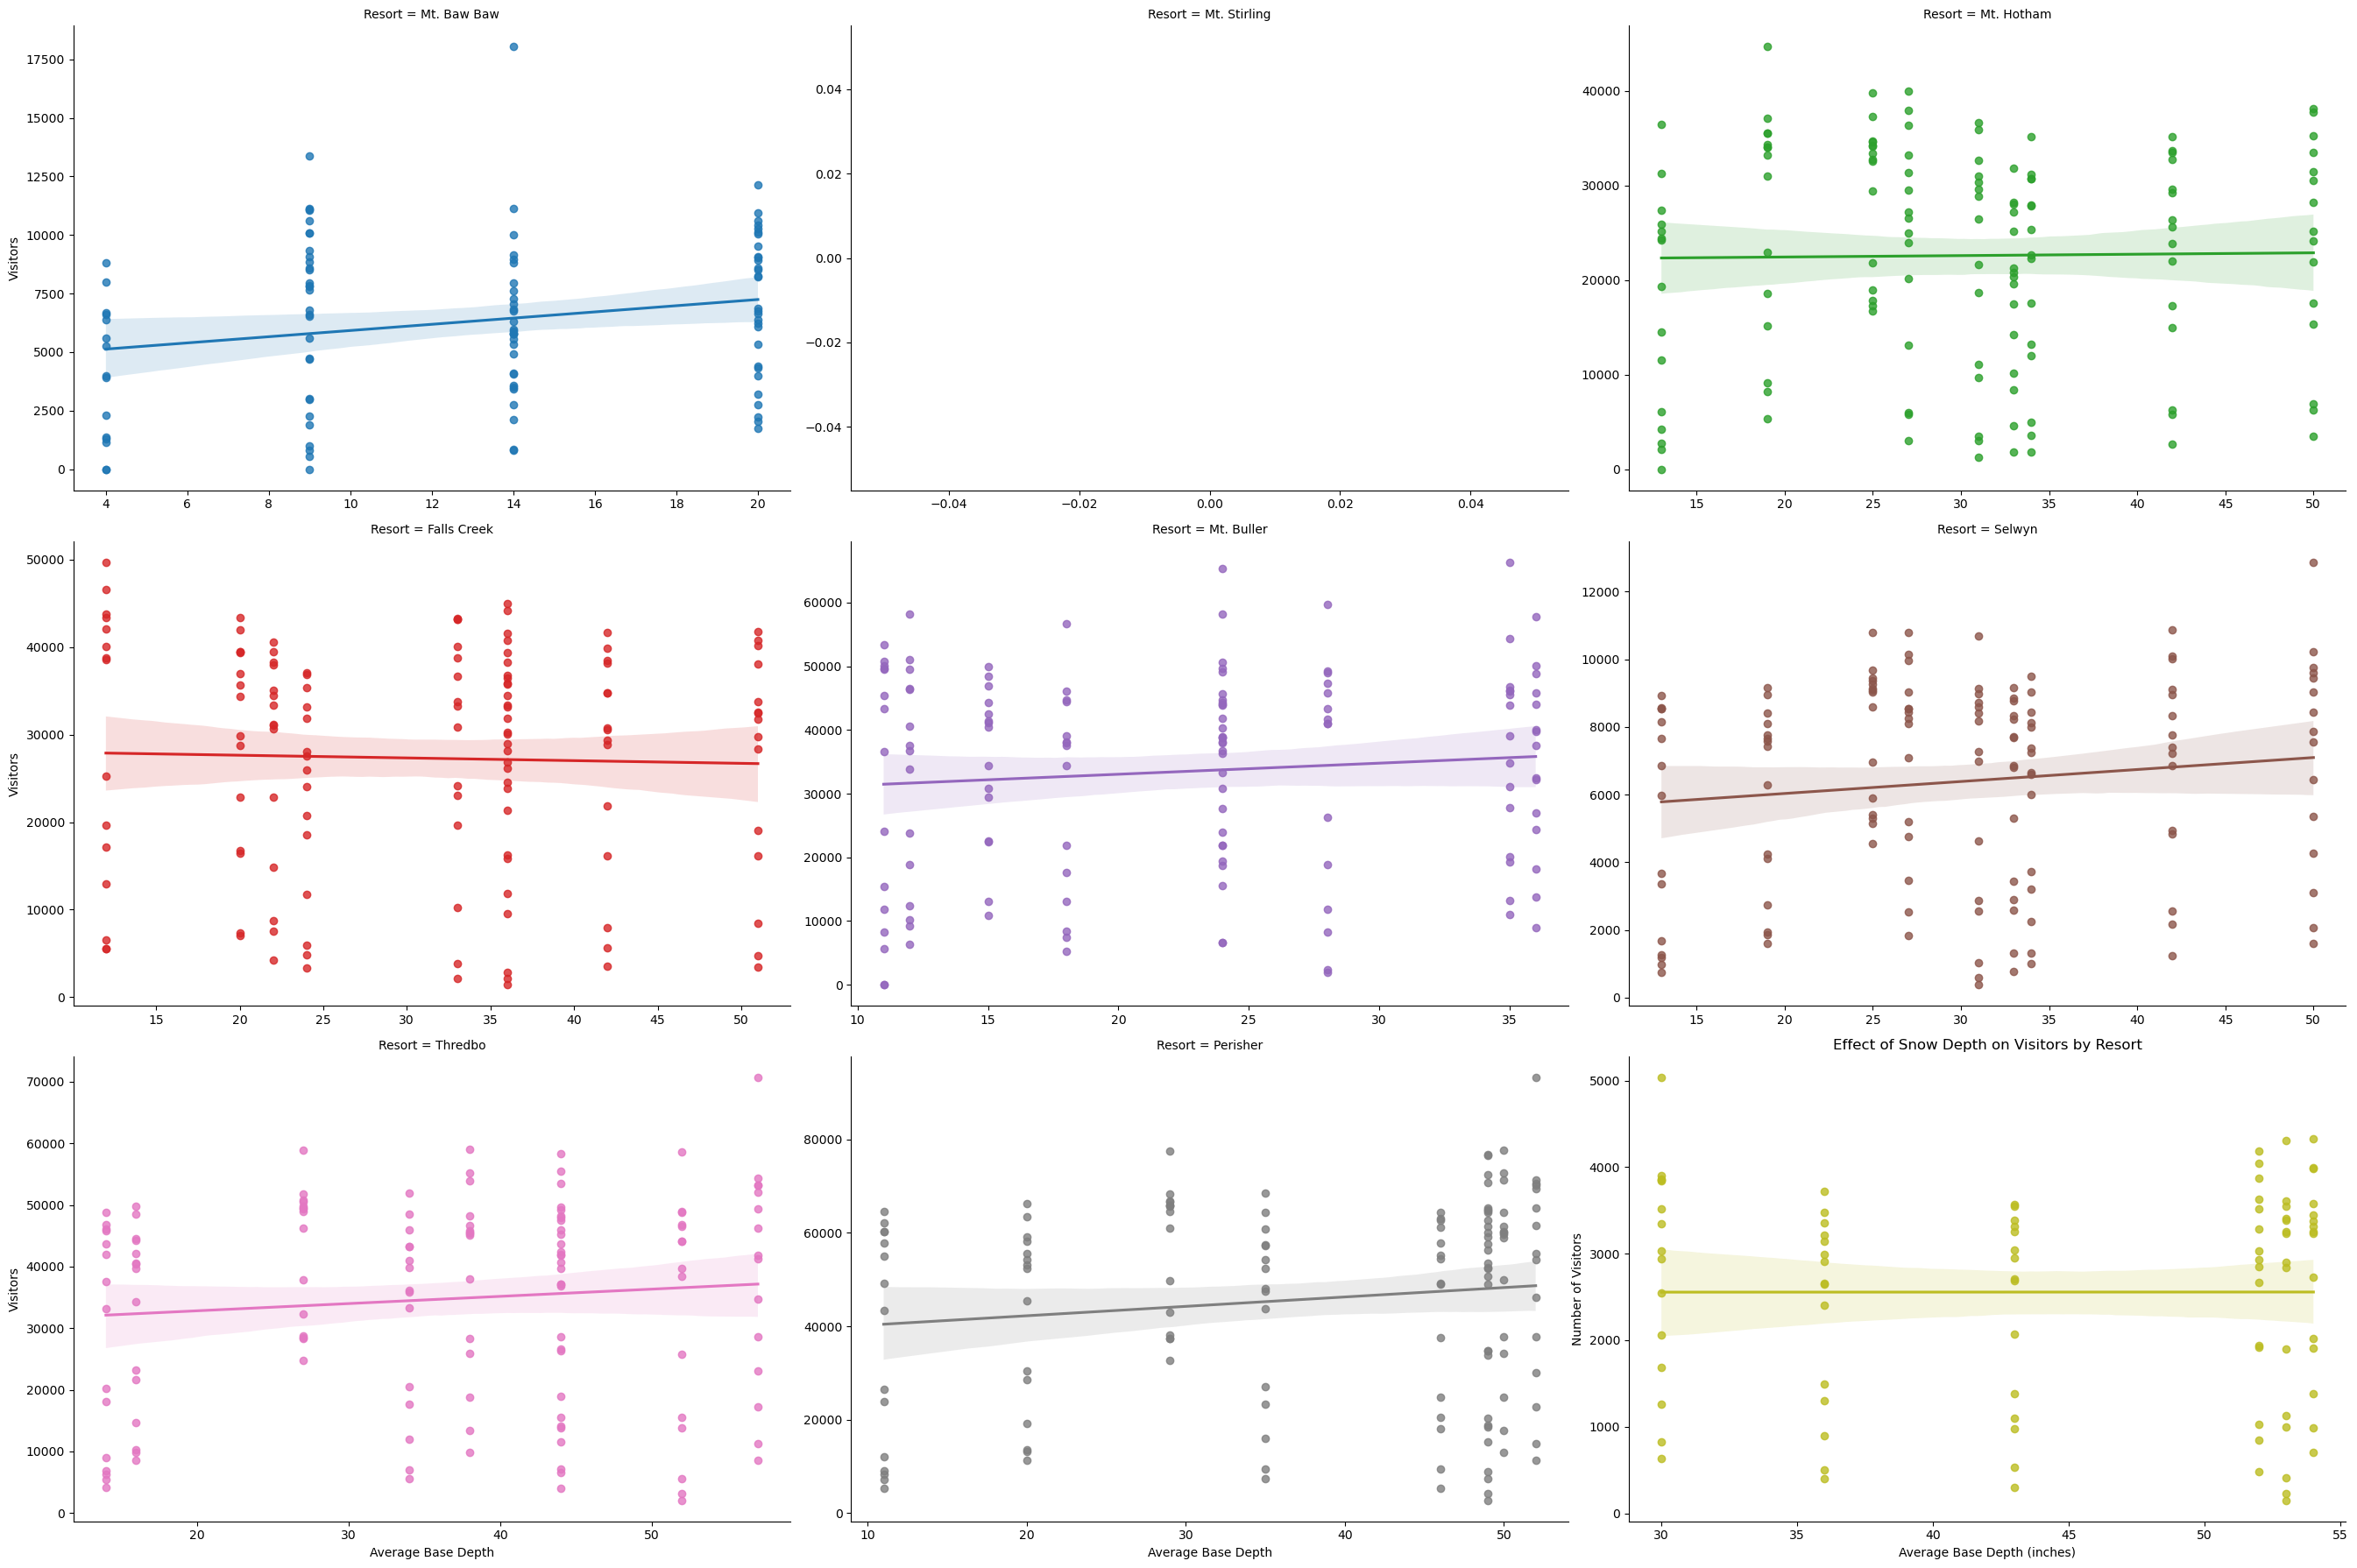

In [156]:
yearly_snow = df[['Year', 'Average Base Depth','Resort','Visitors']].drop_duplicates()
yearly_snow = yearly_snow[~yearly_snow['Year'].isin([2020,2021])]

sns.lmplot(
    x='Average Base Depth',
    y='Visitors',      # color by Resort
    data=df[~df['Year'].isin([2020,2021])],
    hue="Resort",
    col="Resort",
    height=6,
    aspect=1.5,
    markers='o',
    col_wrap=3,
    facet_kws={'sharex': False, 'sharey':False}    # slightly transparent points
)
plt.title('Effect of Snow Depth on Visitors by Resort')
plt.xlabel('Average Base Depth (inches)')
plt.ylabel('Number of Visitors')
plt.show()